In [168]:
sp=pd.read_excel('/Users/adityodasgupta/Documents/McGill/BUSA/TD-Asset-Mangement/Data/SP500_values.xlsx')
sp.sort_values(by='Date',inplace=True)
sp=sp[(sp['Date']>='1998-01-31')&(sp['Date']<='2022-02-01')]
sp=sp[['Date','Return']]
sp.reset_index(inplace=True)

In [169]:
for i in range(len(sp)):
    if int(sp['Date'][i].strftime("%d"))==1:
        sp.loc[i,'Date']=sp.loc[i,'Date']-pd.Timedelta(days=1)

In [170]:
sp.drop(columns='index',inplace=True)

In [171]:
#pip install fredapi

In [172]:
#pip install -U pandasql

In [173]:
from fredapi import Fred
import pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [174]:
import pandas as pd
import re
from datetime import timedelta
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [175]:
pd.set_option('display.max_rows', 500)

In [176]:
factors_list=[['Average weekly hours for manufacturing','AWHAEMAN'],
['4-Week Moving Average of Continued Claims','CC4WSA'],
['Manufacturers new orders for non-defense capital goods','ANDENO'],
['Manufacturers new orders for consumer goods and materials','ACOGNO'],
['Building permits for new private housing units ','PERMIT'],
['Job Openings (Manufacturing)','JTS3000JOL'],
['University of Michigan: Consumer Sentiment','UMCSENT'],
['Average Weekly Hours of Production and Nonsupervisory Employees, Manufacturing','AWHMAN'],
['Employees on non-agricultural payrolls','PAYEMS'],
['Aggregate real person income (less transfer payment)','DSPIC96'],
['Average Weeks Unemployed','UEMPMEAN'],
['Auto Inventory/Sales Ratio','AISRSA'],
['Manufacturers Inventory/Sales Ratio','MNFCTRIRSA'],
['Total unit labor cost','LCULMN01USQ661S'],
#['Unemployment Rate','UNRATE'],
['Commercial and industrial loans outstanding','BUSLOANS'],
['US dollar Index (Nominal Broad U.S. Dollar Index)','DTWEXBGS'],
#['US GDP','GDP'],
['US unemployment rate','UNRATE'],
['Consumer Price Index (All Urban Items)','CPIAUCSL'],
['Sticky Consumer Price Index','STICKCPIM157SFRBATL'],
['Producer Price Index by Industry (WPI)','PCUAWHLTRAWHLTR'],
['Federal Government Tax Income on Corporate','B075RC1Q027SBEA'],
['US Public debt','GFDEBTN'],
['Retail sales ','RSXFS'],
['Personal income tax','IITTRHB'],
['Rent of Primary Residence in U.S. City Average','CUSR0000SEHA'],
['Food Inflation (Consumer Price Index for All Urban Consumers: Food in U.S. City Average)','CPIUFDSL'],
['Energy Inflation (Consumer Price Index for All Urban Consumers: Energy in U.S. City Average)','CPIENGSL'],
['CBOE Volatility Index (VIX)','VIXCLS'],
['Industrial Output','INDPRO'],
['Interest Rates','REAINTRATREARAT10Y'],
['Call Money/Interbank Rate for the United States','IRSTCI01USM156N'],
['Economic Policy Uncertainty Index for United States','USEPUINDXD'],
['Coincident Economic Activity Index for the United States','USPHCI'],
['Weekly Economic Index (Lewis-Mertens-Stock)','WEI'],
['Security Brokers and Dealers; Margin Accounts at Brokers and Dealers; Asset, Level','BOGZ1FL663067003Q'],
['Velocity of M2 Money Stock','M2V'],
['15-Year Fixed Rate Mortgage Average in the United States','MORTGAGE15US'],
['Real Estate Loans: Residential Real Estate Loans: Revolving Home Equity Loans, All Commercial Banks','RHEACBW027SBOG'],
['Federal Government: Current Expenditures','FGEXPND'],
['Imports of Goods and Services','IMPGS'],
['Export Price Index (End Use): All Commodities','IQ'],
['Loan Performance: Total Loans and Leases: Noncurrent Rate','QBPLNTLNNCUR'],
['Equity Market Volatility Tracker: Overall','EMVOVERALLEMV'],
['Federal government current tax receipts','W006RC1Q027SBEA']]

In [177]:
from tqdm import tqdm

In [178]:
dic={}

In [180]:
no_auto = []
autolist = []
for i,j in tqdm(factors_list):
    dummy = pd.DataFrame(fred.get_series(j))
    dummy.reset_index(inplace=True)
    dummy.columns=['date','factor']
    dummy['factor']=dummy['factor'].pct_change(1)
    dummy=dummy[(dummy['date']>='2000-01-01')&(dummy['date']<='2021-12-31')]
    dummy.dropna(inplace=True)
    dummy.replace(np.inf,0,inplace=True)
    
    import statsmodels.api as sm

    print("Auto correlated variables:\n")

    
    
    y=dummy['factor'][1:]
    X=dummy['factor'].shift(1)[1:]

    model = sm.OLS(y, X,missing='drop').fit()

    # Extract the residuals
    residuals = model.resid

    # Perform the Durbin-Watson test
    dw_test = sm.stats.stattools.durbin_watson(residuals)

        #adf_test = adfuller(factors[c[i]])
    if dw_test not in pd.Interval(left=1.5, right=2.5, closed='both'):
        print(f'{i}:\nDurbin: {dw_test}\n')
        autolist.append(i)
    else:
        #print(f'{i}:\nDurbin: {dw_test}\n')
        no_auto.append(i)
    
    dic[i]=list(dummy['factor'])

print('Number of Auto correlated variables:', len(autolist))


  2%|█                                           | 1/44 [00:00<00:16,  2.65it/s]

Auto correlated variables:



  5%|██                                          | 2/44 [00:00<00:19,  2.12it/s]

Auto correlated variables:

4-Week Moving Average of Continued Claims:
Durbin: 1.2531181942407534



  7%|███                                         | 3/44 [00:01<00:14,  2.76it/s]

Auto correlated variables:



  9%|████                                        | 4/44 [00:01<00:12,  3.20it/s]

Auto correlated variables:



 11%|█████                                       | 5/44 [00:01<00:12,  3.07it/s]

Auto correlated variables:



 14%|██████                                      | 6/44 [00:01<00:11,  3.30it/s]

Auto correlated variables:



 16%|███████                                     | 7/44 [00:02<00:16,  2.19it/s]

Auto correlated variables:



 18%|████████                                    | 8/44 [00:03<00:15,  2.34it/s]

Auto correlated variables:



 20%|█████████                                   | 9/44 [00:03<00:13,  2.51it/s]

Auto correlated variables:



 23%|█████████▊                                 | 10/44 [00:03<00:12,  2.73it/s]

Auto correlated variables:



 25%|██████████▊                                | 11/44 [00:04<00:11,  2.80it/s]

Auto correlated variables:



 27%|███████████▋                               | 12/44 [00:04<00:10,  3.05it/s]

Auto correlated variables:



 30%|████████████▋                              | 13/44 [00:04<00:09,  3.25it/s]

Auto correlated variables:



 32%|█████████████▋                             | 14/44 [00:04<00:09,  3.31it/s]

Auto correlated variables:



 34%|██████████████▋                            | 15/44 [00:05<00:09,  3.11it/s]

Auto correlated variables:



 36%|███████████████▋                           | 16/44 [00:05<00:11,  2.34it/s]

Auto correlated variables:



 39%|████████████████▌                          | 17/44 [00:06<00:10,  2.47it/s]

Auto correlated variables:



 41%|█████████████████▌                         | 18/44 [00:06<00:12,  2.05it/s]

Auto correlated variables:



 43%|██████████████████▌                        | 19/44 [00:07<00:11,  2.26it/s]

Auto correlated variables:



 45%|███████████████████▌                       | 20/44 [00:07<00:09,  2.62it/s]

Auto correlated variables:



 48%|████████████████████▌                      | 21/44 [00:07<00:08,  2.85it/s]

Auto correlated variables:



 50%|█████████████████████▌                     | 22/44 [00:08<00:07,  3.07it/s]

Auto correlated variables:



 52%|██████████████████████▍                    | 23/44 [00:08<00:06,  3.23it/s]

Auto correlated variables:



 55%|███████████████████████▍                   | 24/44 [00:08<00:07,  2.62it/s]

Auto correlated variables:



 57%|████████████████████████▍                  | 25/44 [00:09<00:08,  2.23it/s]

Auto correlated variables:

Rent of Primary Residence in U.S. City Average:
Durbin: 2.9002612635054867



 59%|█████████████████████████▍                 | 26/44 [00:09<00:07,  2.41it/s]

Auto correlated variables:



 61%|██████████████████████████▍                | 27/44 [00:10<00:06,  2.59it/s]

Auto correlated variables:



 64%|███████████████████████████▎               | 28/44 [00:11<00:10,  1.53it/s]

Auto correlated variables:



 66%|████████████████████████████▎              | 29/44 [00:11<00:08,  1.74it/s]

Auto correlated variables:



 68%|█████████████████████████████▎             | 30/44 [00:12<00:06,  2.09it/s]

Auto correlated variables:



 70%|██████████████████████████████▎            | 31/44 [00:12<00:05,  2.26it/s]

Auto correlated variables:



 73%|███████████████████████████████▎           | 32/44 [00:13<00:09,  1.33it/s]

Auto correlated variables:



 75%|████████████████████████████████▎          | 33/44 [00:14<00:06,  1.64it/s]

Auto correlated variables:



 77%|█████████████████████████████████▏         | 34/44 [00:14<00:05,  1.94it/s]

Auto correlated variables:



 80%|██████████████████████████████████▏        | 35/44 [00:14<00:03,  2.35it/s]

Auto correlated variables:

Auto correlated variables:



 84%|████████████████████████████████████▏      | 37/44 [00:15<00:02,  2.66it/s]

Auto correlated variables:



 86%|█████████████████████████████████████▏     | 38/44 [00:15<00:02,  2.53it/s]

Auto correlated variables:



 89%|██████████████████████████████████████     | 39/44 [00:16<00:01,  2.89it/s]

Auto correlated variables:



 91%|███████████████████████████████████████    | 40/44 [00:16<00:01,  3.21it/s]

Auto correlated variables:



 95%|█████████████████████████████████████████  | 42/44 [00:16<00:00,  3.66it/s]

Auto correlated variables:

Auto correlated variables:



 98%|██████████████████████████████████████████ | 43/44 [00:16<00:00,  3.76it/s]

Auto correlated variables:



100%|███████████████████████████████████████████| 44/44 [00:17<00:00,  2.55it/s]

Auto correlated variables:

Number of Auto correlated variables: 2


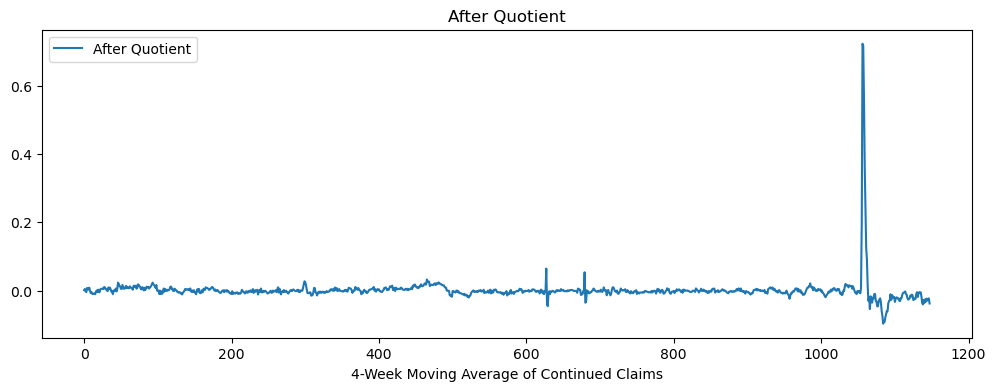

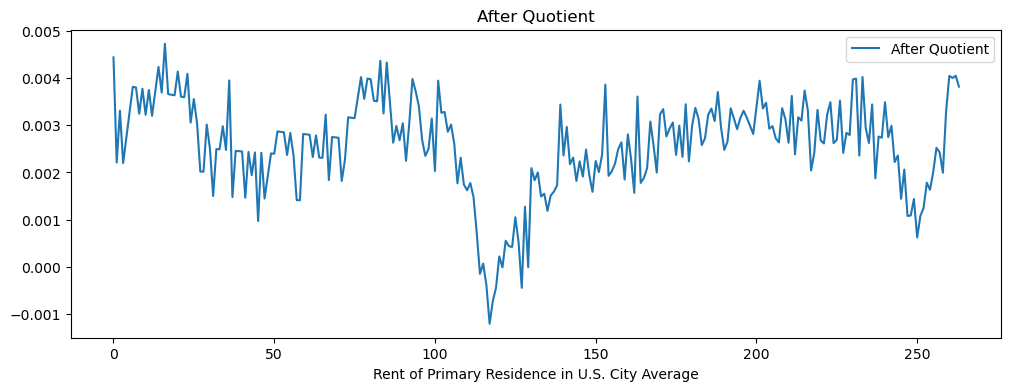

In [181]:
for i in autolist:
    plt.figure(figsize = (12,4)) 
    plt.plot(dic[i], label = "After Quotient")
    plt.legend(loc='best')
    plt.xlabel(i)
    plt.title('After Quotient')
    plt.show()

In [182]:
dic2={}

In [183]:
from statsmodels.tsa.stattools import adfuller

stat_nonauto = []
non_stat_nonauto = []
print("Non-stationary variables:\n")
for i,j in tqdm(factors_list):

    dummy = pd.DataFrame(fred.get_series(j))
    dummy.reset_index(inplace=True)
    dummy.columns=['date','factor']
    dummy['factor']=dummy['factor'].pct_change(1)
    dummy=dummy[(dummy['date']>='2000-01-01')&(dummy['date']<='2021-12-31')]
    dummy.replace(np.inf,0,inplace=True)
    
    
    
    adf_test = adfuller(dummy['factor'].dropna())
    if adf_test[1] > 0.05:
        print(f'{i}:\nADF Statistic: {adf_test[0]}\nCritical Value @ 0.05: {adf_test[4]["5%"]}\np-value: {adf_test[1]}\n')
        non_stat_nonauto.append(i)
    else:
        stat_nonauto.append(i)
    
    dic2[i]=list(dummy['factor'])

print('Number of non-stationary variables:', len(non_stat_nonauto))

Non-stationary variables:



 50%|█████████████████████▌                     | 22/44 [00:07<00:05,  3.81it/s]

US Public debt:
ADF Statistic: -2.6004713740816534
Critical Value @ 0.05: -2.9009249540740742
p-value: 0.0928998831335241



 86%|█████████████████████████████████████▏     | 38/44 [00:14<00:02,  2.37it/s]

Real Estate Loans: Residential Real Estate Loans: Revolving Home Equity Loans, All Commercial Banks:
ADF Statistic: -2.4154424980518225
Critical Value @ 0.05: -2.8641011312034057
p-value: 0.1374252292676963



 95%|█████████████████████████████████████████  | 42/44 [00:15<00:00,  3.61it/s]

Loan Performance: Total Loans and Leases: Noncurrent Rate:
ADF Statistic: -2.5963691945223624
Critical Value @ 0.05: -2.895382030636155
p-value: 0.09375000547576379



100%|███████████████████████████████████████████| 44/44 [00:16<00:00,  2.66it/s]

Number of non-stationary variables: 3


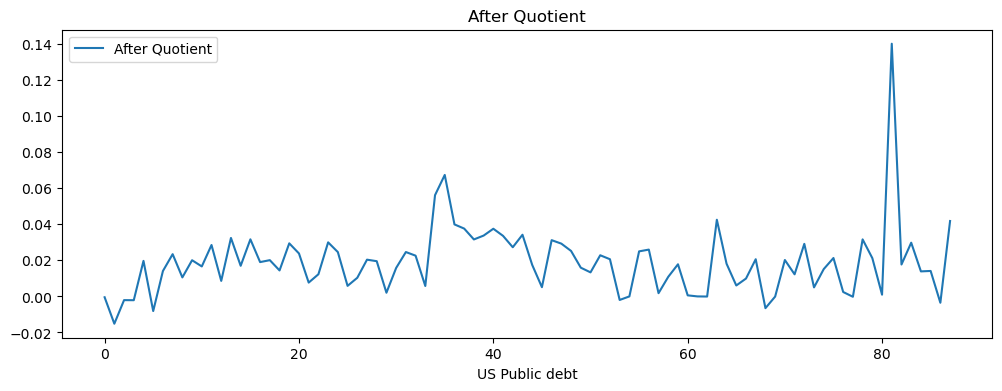

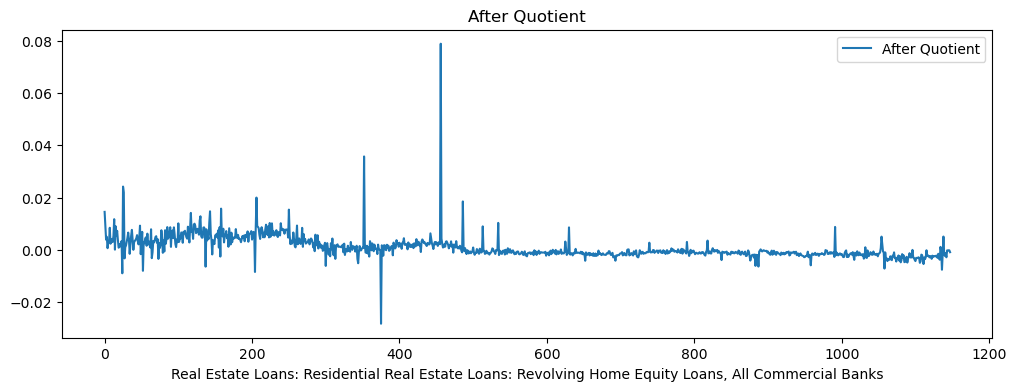

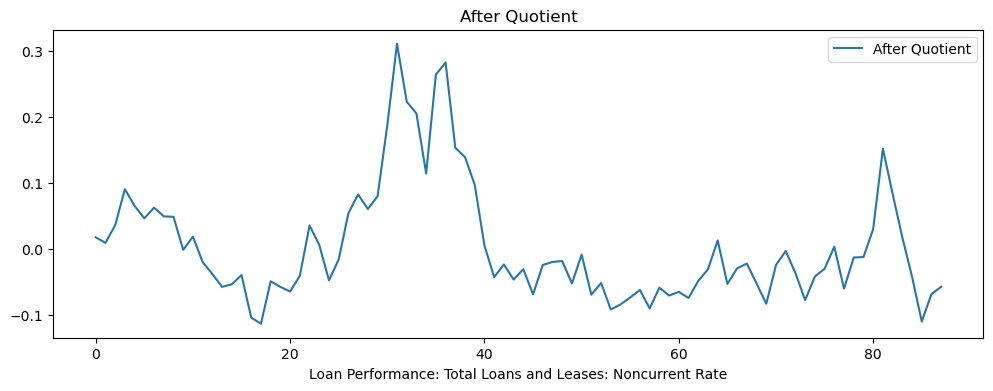

In [184]:
for i in non_stat_nonauto:
    plt.figure(figsize = (12,4)) 
    plt.plot(dic[i], label = "After Quotient")
    plt.legend(loc='best')
    plt.xlabel(i)
    plt.title('After Quotient')
    plt.show()

In [185]:
dic3={}

In [186]:
sp.columns=['date','sp500']

In [187]:
import numpy as np

In [188]:
for i,j in tqdm(factors_list):
    dummy = pd.DataFrame(fred.get_series(j))
    dummy.reset_index(inplace=True)
    dummy.columns=['date','factor']
    dummy.replace('nan',np.mean(dummy['factor'][1:]),inplace=True)
    dummy['factor']=dummy['factor'].pct_change(1)
    dummy=dummy[(dummy['date']>='1997-01-01')&(dummy['date']<='2022-01-31')]
    
    
    
    df = pysqldf("""SELECT 
        a.sp500, a.date as date, b.factor, b.date as date_b
     FROM
        sp a
     LEFT JOIN
        dummy b
           ON a.date >= b.date""")
    
    df['row_num']=df.groupby(['date'])['date_b'].rank(method='first',ascending=False) 
    df1=df[df['row_num']==1]
    
    dic3[i]=list(df1['factor'])

100%|███████████████████████████████████████████| 44/44 [00:40<00:00,  1.08it/s]


In [189]:
dic3['Average weekly hours for manufacturing'][0]=np.mean(dic3['Average weekly hours for manufacturing'][1:])
dic3['Job Openings (Manufacturing)'][0]=np.mean(dic3['Average weekly hours for manufacturing'][1:])
dic3['Producer Price Index by Industry (WPI)'][0]=np.mean(dic3['Average weekly hours for manufacturing'][1:])
dic3['Average weekly hours for manufacturing'][0]=np.mean(dic3['Average weekly hours for manufacturing'][1:])

In [190]:
for i in dic3.keys():
    if len(dic3[i]) !=289:
        lis=[]
        for j in range(289-len(dic3[i])):
            lis.append(dic3[i][0])
        lis.extend(dic3[i])
        dic3[i]=lis

In [191]:
join_data=pd.DataFrame(dic3)
final=pd.concat([sp,join_data],axis=1)

In [192]:
final['Rent Inflation Rate']=final['Rent of Primary Residence in U.S. City Average'].pct_change(periods=1)
final.loc[0,'Rent Inflation Rate']=0.24939

In [193]:
gdp = pd.DataFrame(fred.get_series('GDP'))
gdp.reset_index(inplace=True)
gdp.columns=['date','gdp']
gdp=gdp[(gdp['date']>='1997-01-01')&(gdp['date']<='2022-01-31')]

gdp['change']=gdp['gdp'].pct_change(periods=1)

df = pysqldf("""SELECT 
        a.sp500, a.date as date_a, b.change, b.date as date_b
     FROM
        sp a
     LEFT JOIN
        gdp b
           ON a.date >= b.date""")

df['row_num']=df.groupby(['date_a'])['date_b'].rank(method='first',ascending=False)
df=df[df['row_num']==1]

In [194]:
final['US GDP Growth Rate']=list(df['change'])

In [195]:
final.isna().sum()

date                                                                                                   0
sp500                                                                                                  0
Average weekly hours for manufacturing                                                                 0
4-Week Moving Average of Continued Claims                                                              0
Manufacturers new orders for non-defense capital goods                                                 0
Manufacturers new orders for consumer goods and materials                                              0
Building permits for new private housing units                                                         0
Job Openings (Manufacturing)                                                                           0
University of Michigan: Consumer Sentiment                                                             0
Average Weekly Hours of Production and Nonsupervisory E

In [196]:
final['sp500_return']=final['sp500']
final['sp500_risk']=(final['sp500'])**2

In [197]:
final

date     sp500  Average weekly hours for manufacturing  \
0   1998-01-31  0.070449                                0.000084   
1   1998-02-28  0.049946                                0.000084   
2   1998-03-31  0.009076                                0.000084   
3   1998-04-30 -0.018826                                0.000084   
4   1998-05-31  0.039438                                0.000084   
5   1998-06-30 -0.011615                                0.000084   
6   1998-07-31 -0.145797                                0.000084   
7   1998-08-31  0.062396                                0.000084   
8   1998-09-30  0.080294                                0.000084   
9   1998-10-31  0.059126                                0.000084   
10  1998-11-30  0.056375                                0.000084   
11  1998-12-31  0.041009                                0.000084   
12  1999-01-31 -0.032283                                0.000084   
13  1999-02-28  0.038794                                0.000084   
14  1999-03-31  0.037944                                0.000084   
15  1999-04-30 -0.024970                                0.000084   
16  1999-05-31  0.054438                                0.000084   
17  1999-06-30 -0.032046                                0.000084   
18  1999-07-31 -0.006254                                0.000084   
19  1999-08-31 -0.028552                                0.000084   
20  1999-09-30  0.062539                                0.000084   
21  1999-10-31  0.019062                                0.000084   
22  1999-11-30  0.057844                                0.000084   
23  1999-12-31 -0.050904                                0.000084   
24  2000-01-31 -0.020108                                0.000084   
25  2000-02-29  0.096720                                0.000084   
26  2000-03-31 -0.030796                                0.000084   
27  2000-04-30 -0.021915                                0.000084   
28  2000-05-31  0.023934                                0.000084   
29  2000-06-30 -0.016341                                0.000084   
30  2000-07-31  0.060699                                0.000084   
31  2000-08-31 -0.053483                                0.000084   
32  2000-09-30 -0.004949                                0.000084   
33  2000-10-31 -0.080069                                0.000084   
34  2000-11-30  0.004053                                0.000084   
35  2000-12-31  0.034637                                0.000084   
36  2001-01-31 -0.092291                                0.000084   
37  2001-02-28 -0.064205                                0.000084   
38  2001-03-31  0.076814                                0.000084   
39  2001-04-30  0.005090                                0.000084   
40  2001-05-31 -0.025035                                0.000084   
41  2001-06-30 -0.010740                                0.000084   
42  2001-07-31 -0.064108                                0.000084   
43  2001-08-31 -0.081723                                0.000084   
44  2001-09-30  0.018099                                0.000084   
45  2001-10-31  0.075176                                0.000084   
46  2001-11-30  0.007574                                0.000084   
47  2001-12-31 -0.015574                                0.000084   
48  2002-01-31 -0.020766                                0.000084   
49  2002-02-28  0.036739                                0.000084   
50  2002-03-31 -0.061418                                0.000084   
51  2002-04-30 -0.009081                                0.000084   
52  2002-05-31 -0.072455                                0.000084   
53  2002-06-30 -0.079004                                0.000084   
54  2002-07-31  0.004881                                0.000084   
55  2002-08-31 -0.110024                                0.000084   
56  2002-09-30  0.086449                                0.000084   
57  2002-10-31  0.057070                                0.000084  

In [198]:
final.drop(columns='Rent of Primary Residence in U.S. City Average',inplace=True)

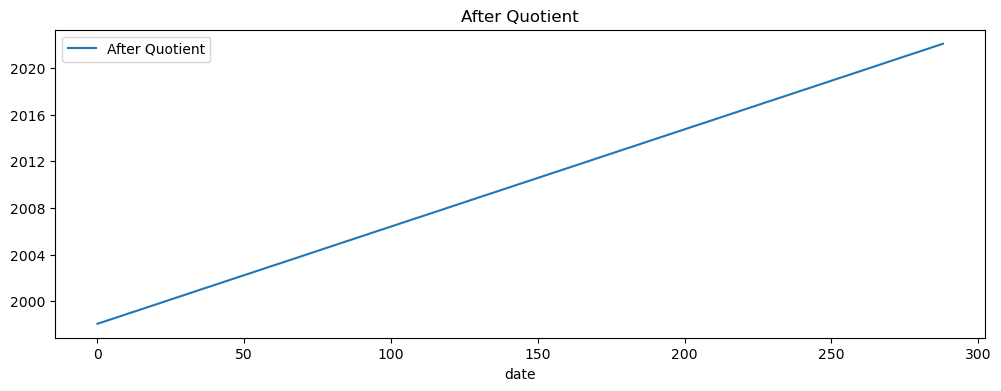

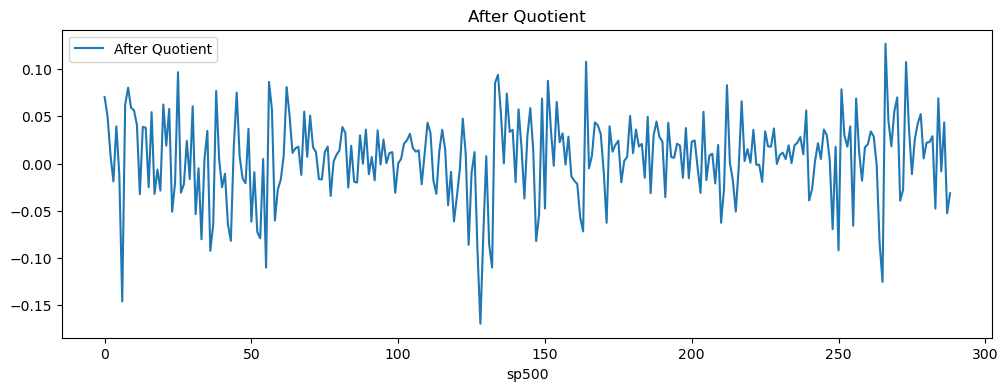

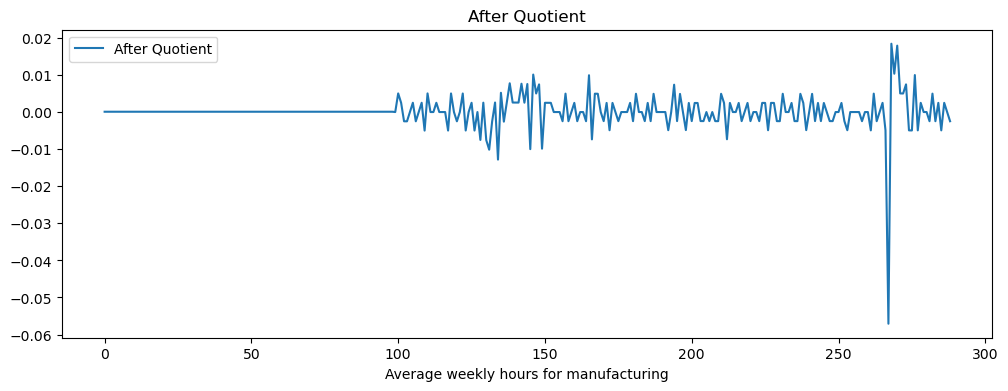

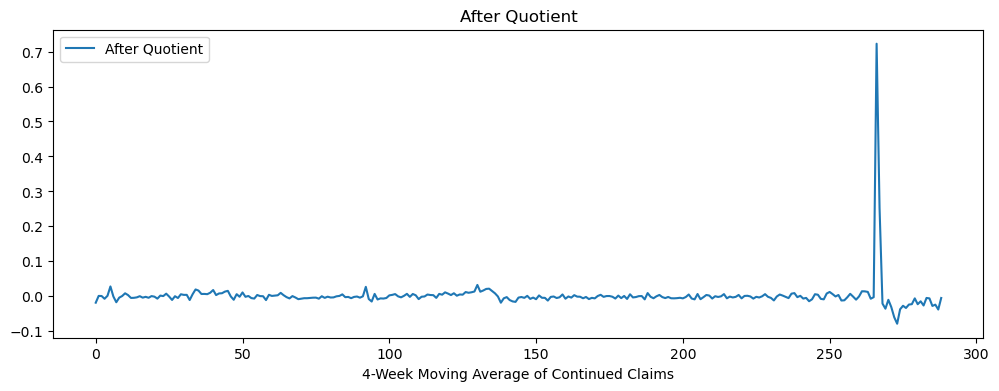

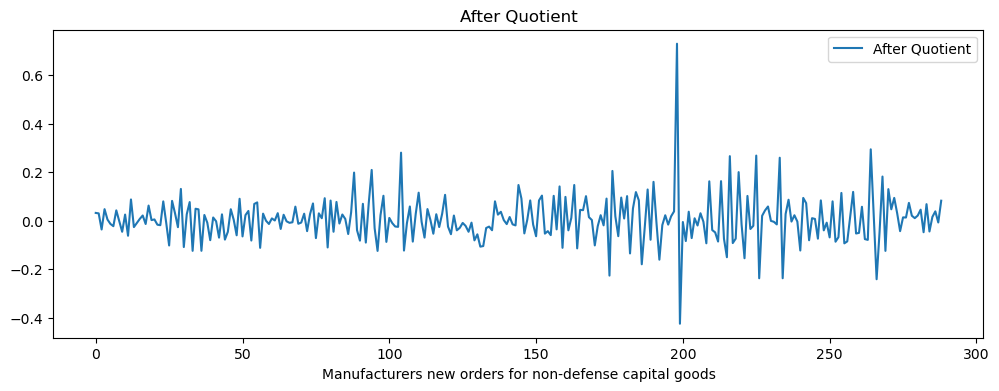

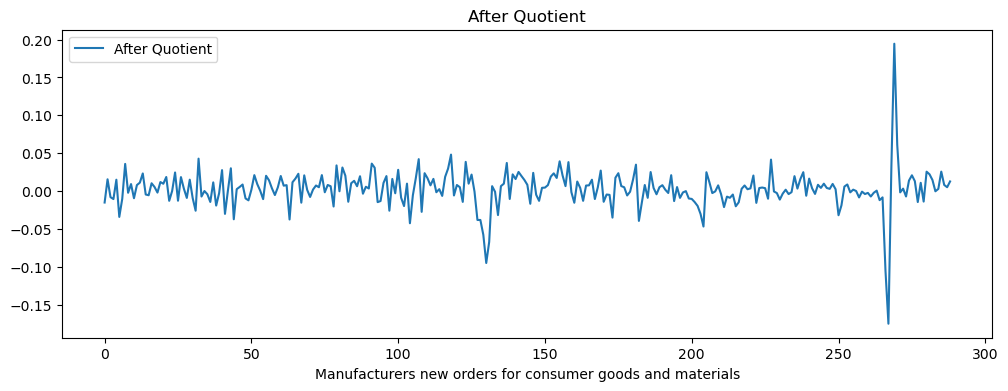

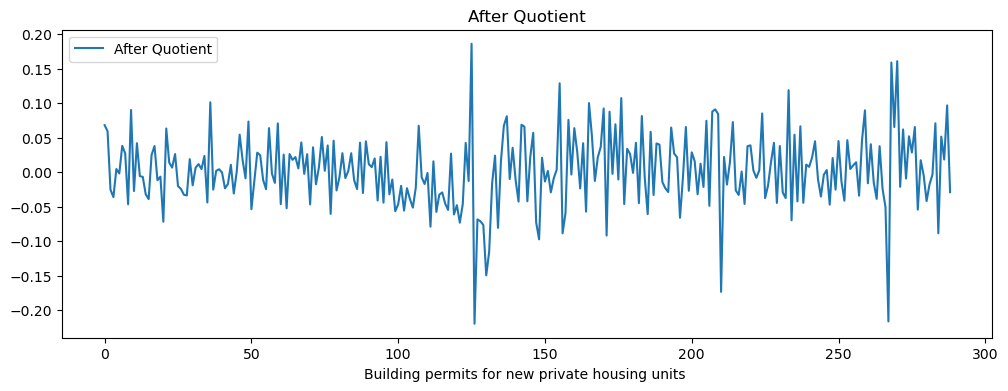

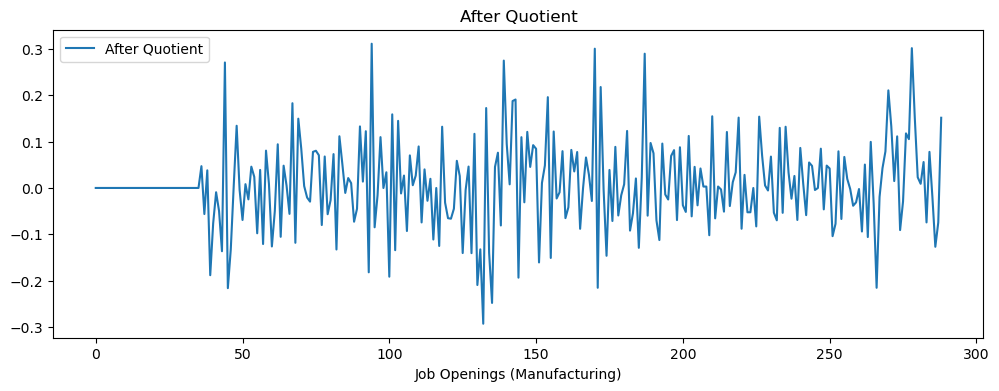

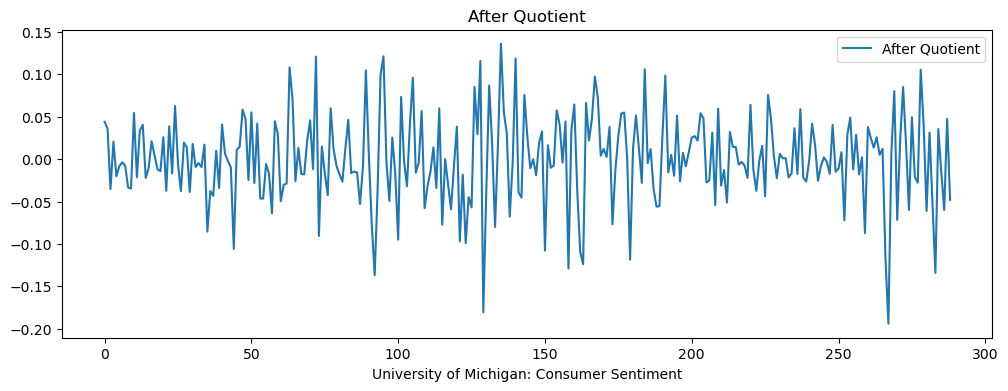

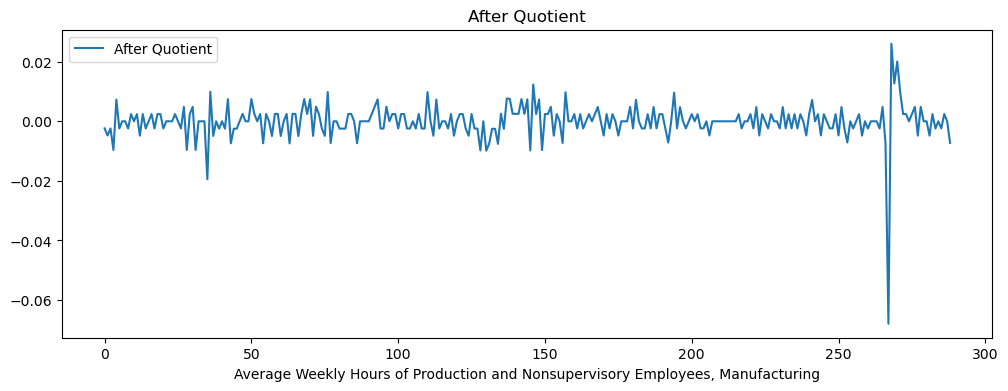

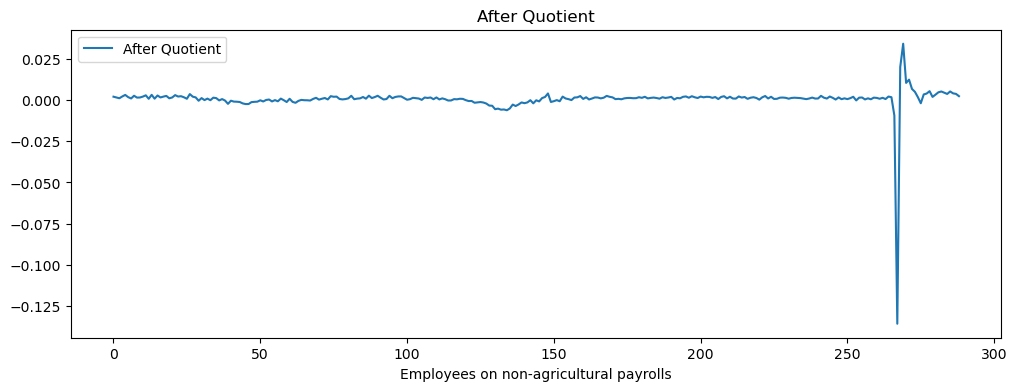

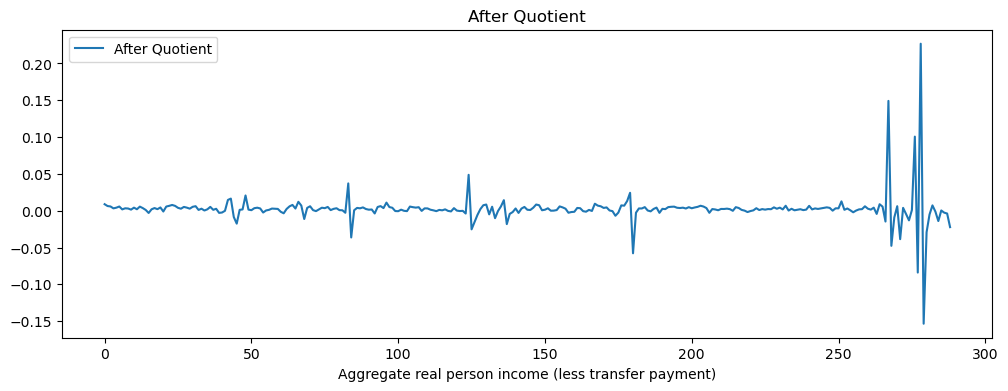

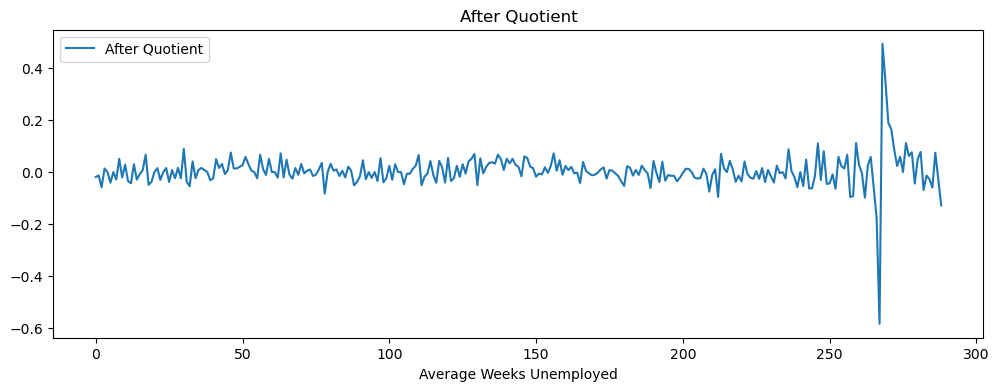

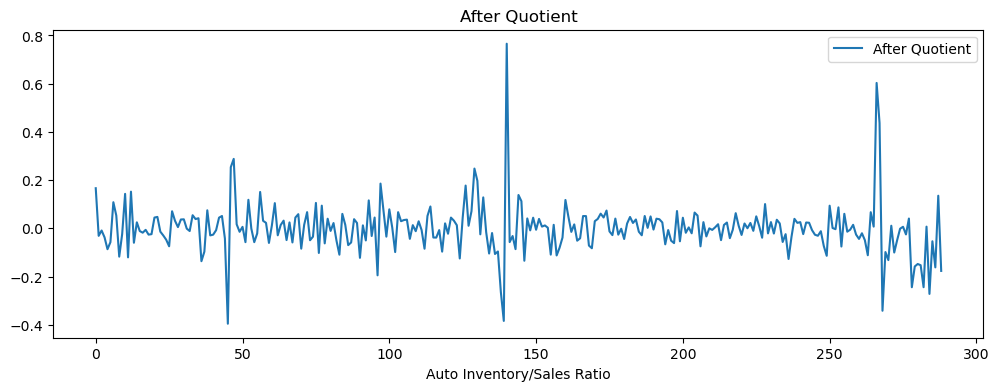

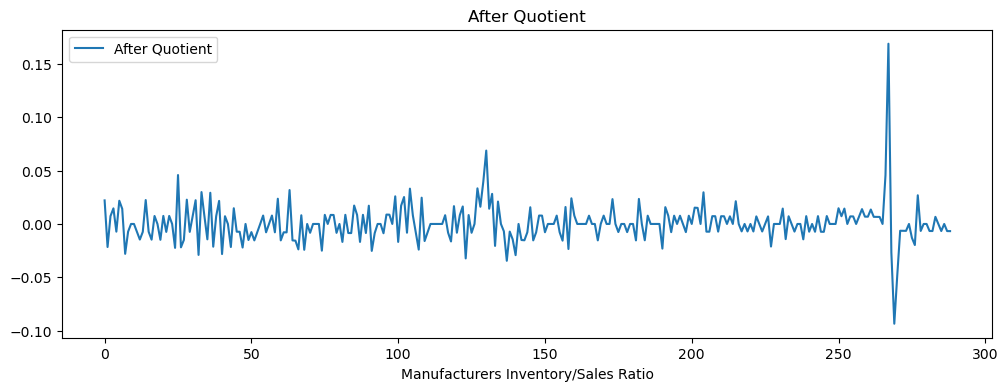

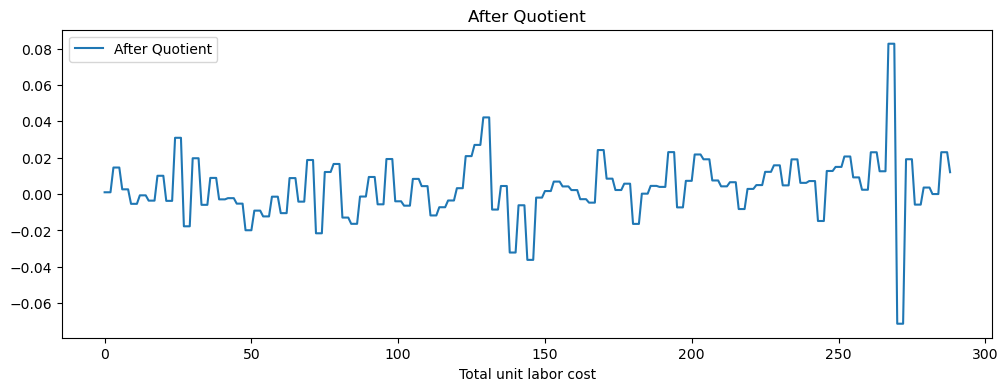

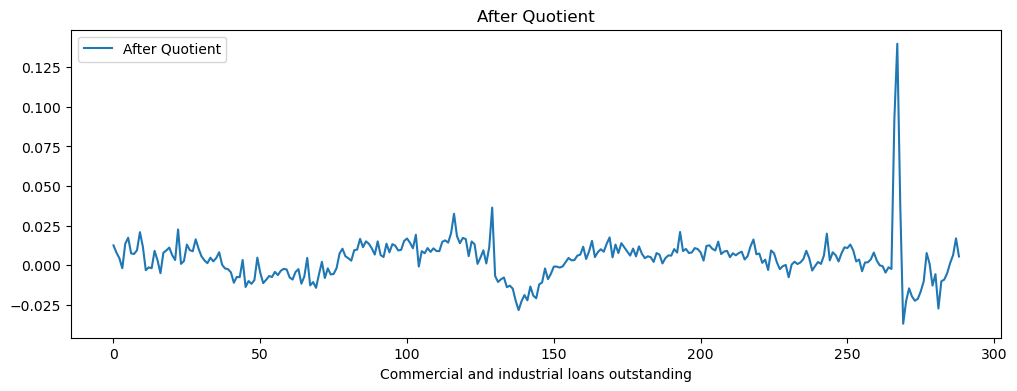

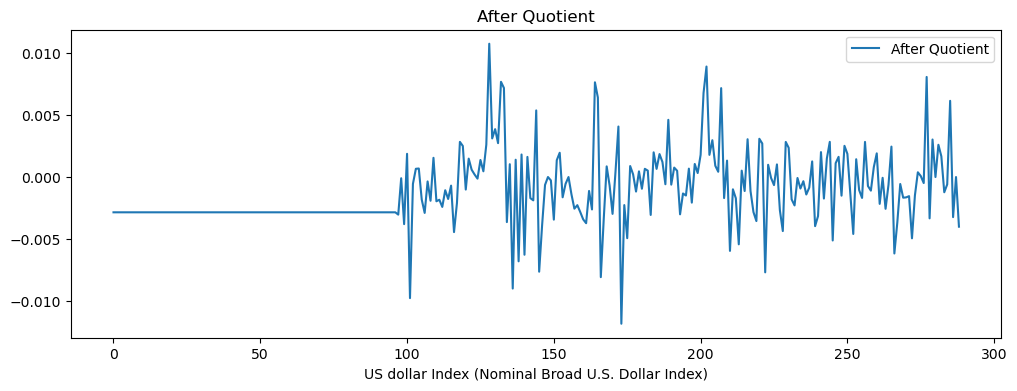

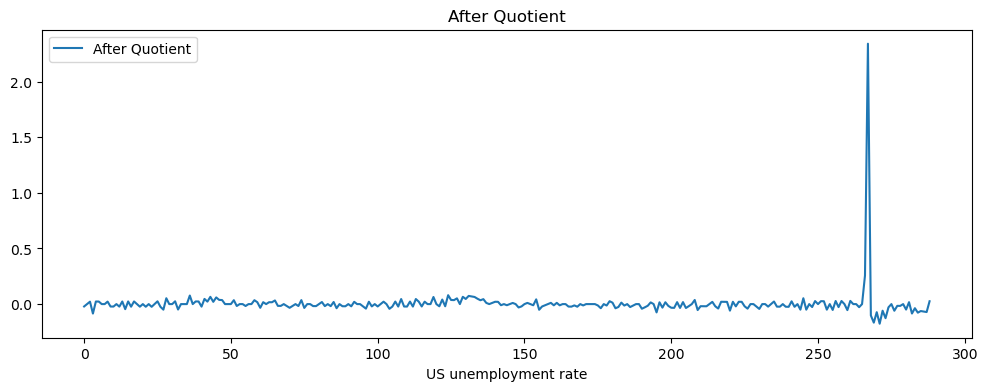

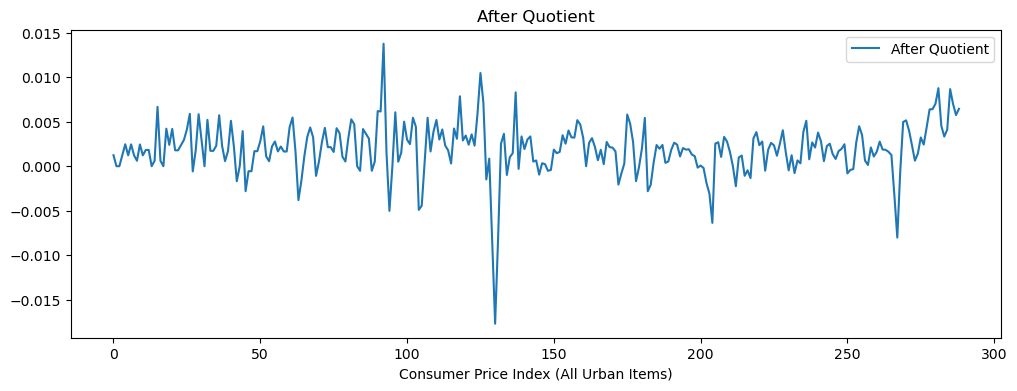

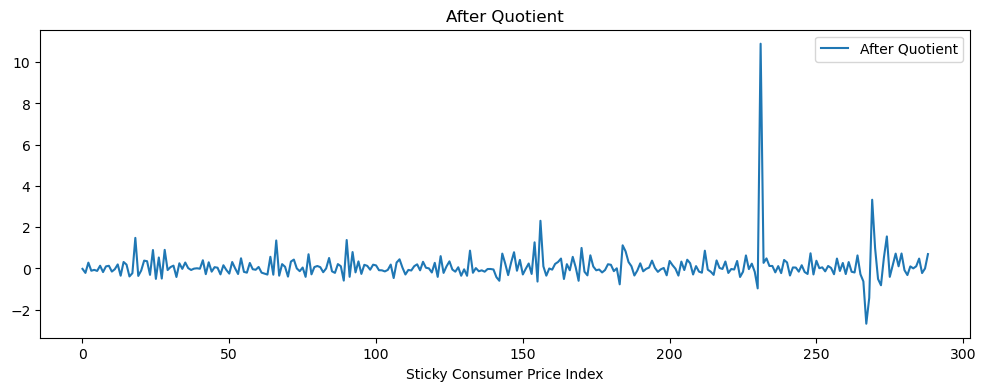

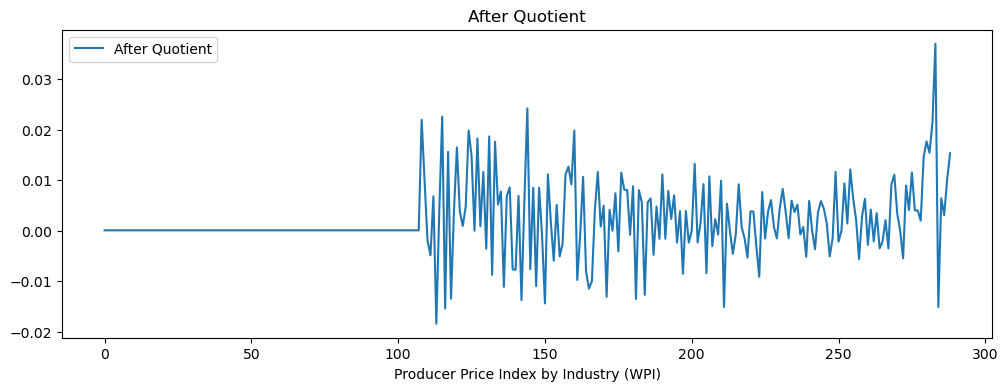

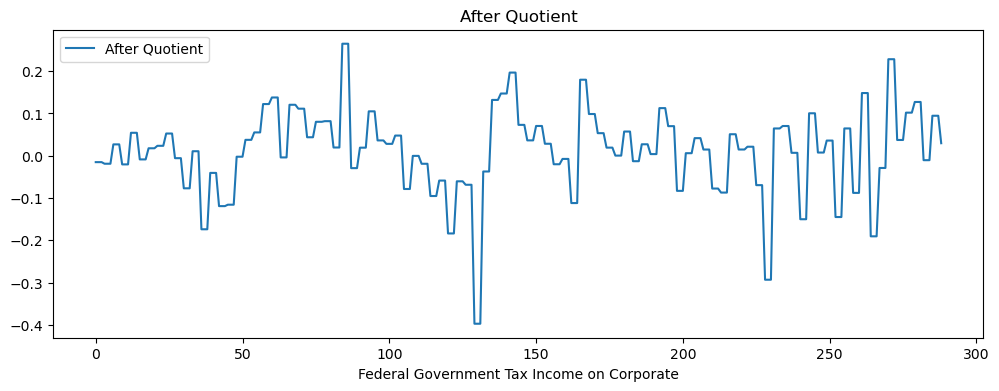

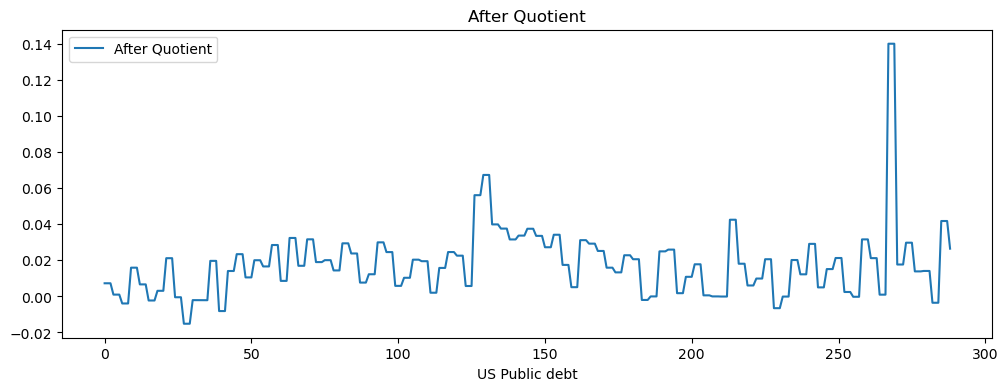

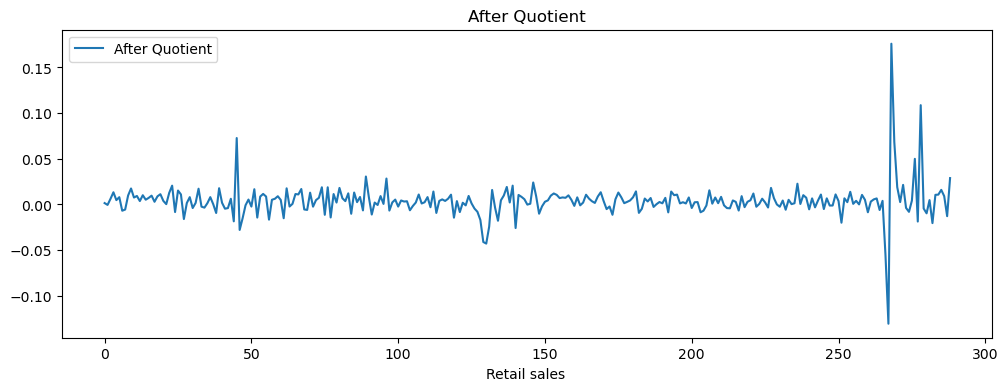

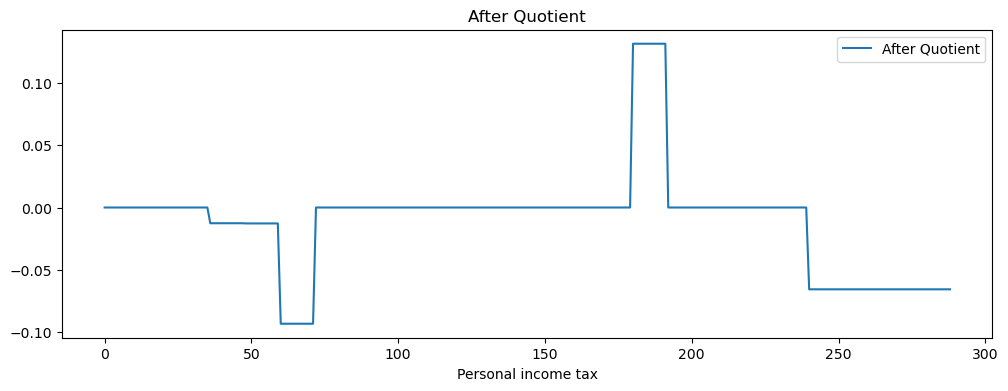

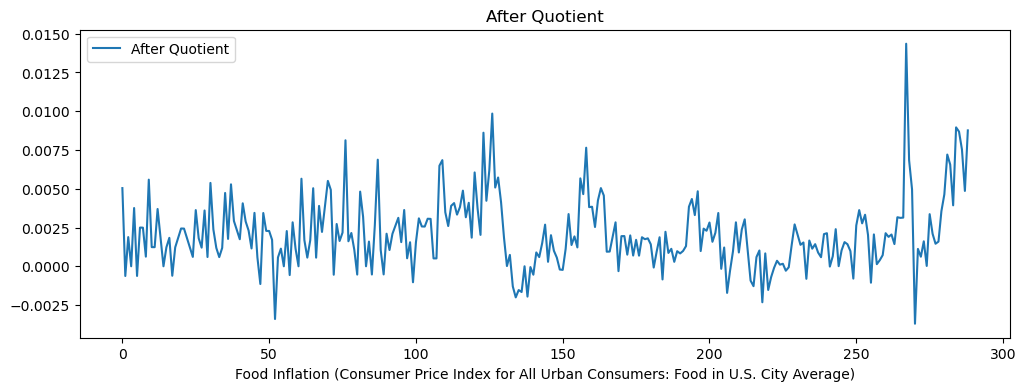

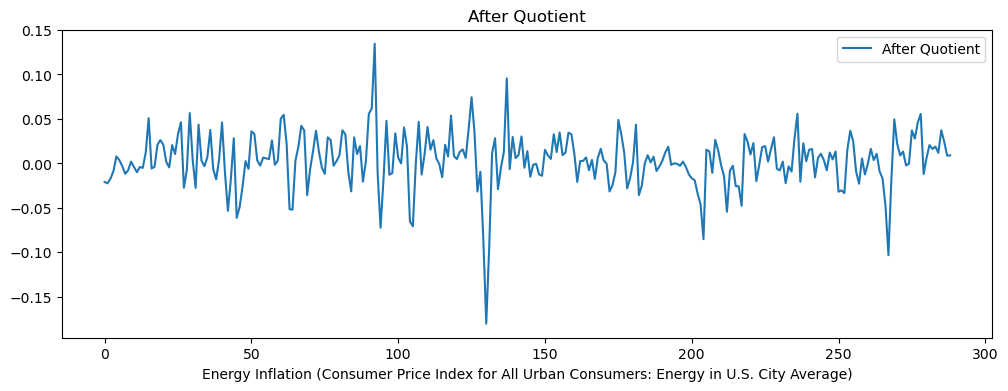

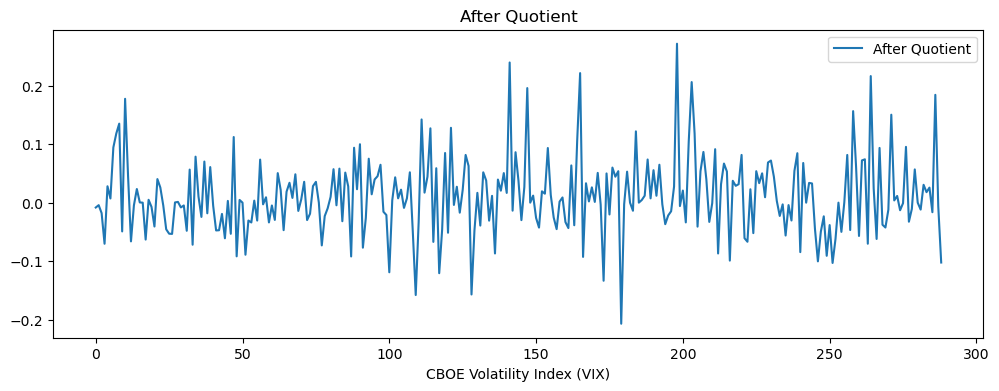

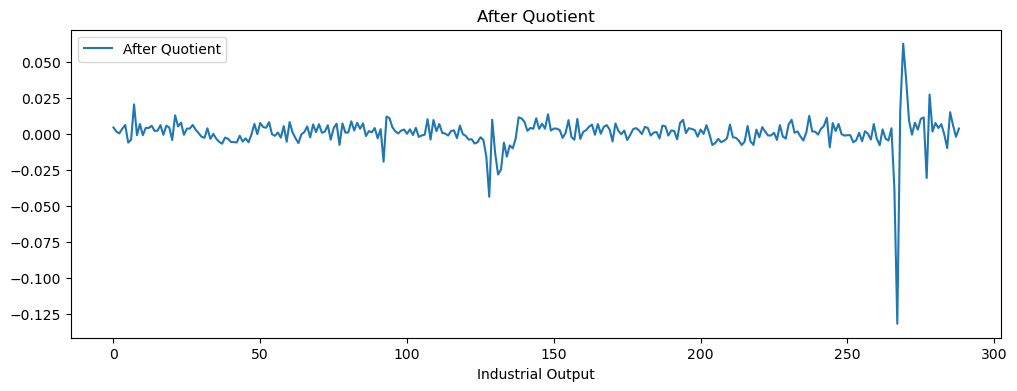

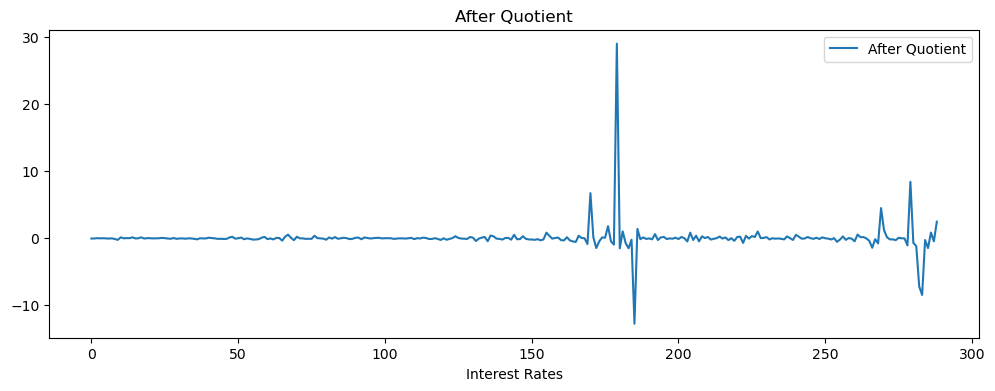

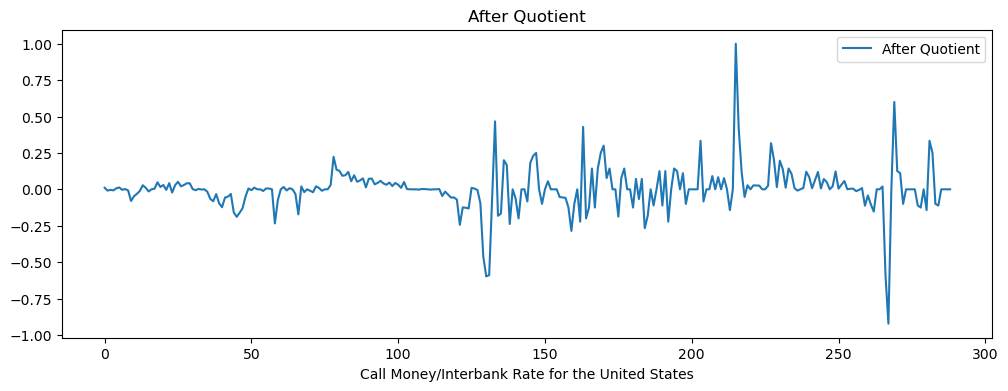

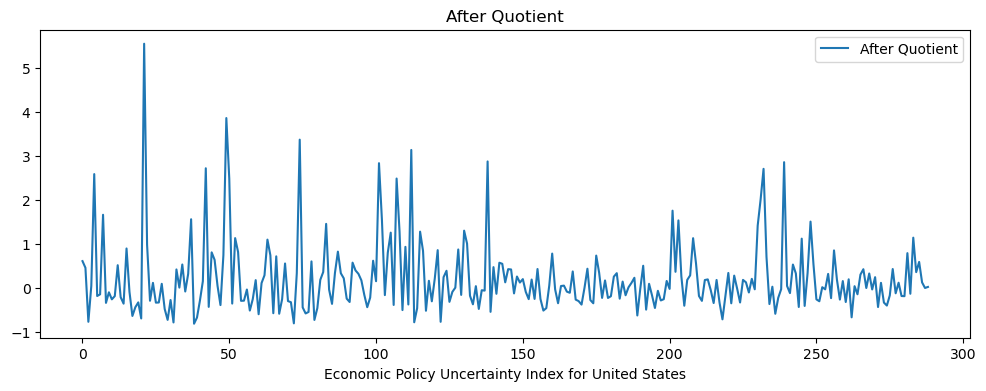

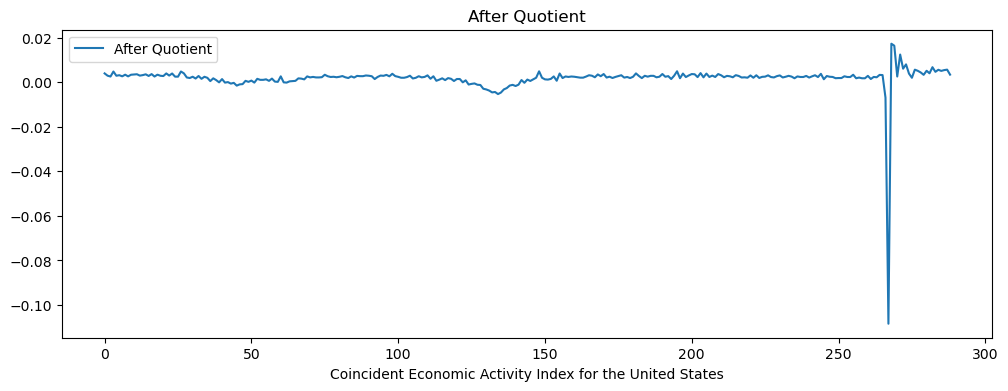

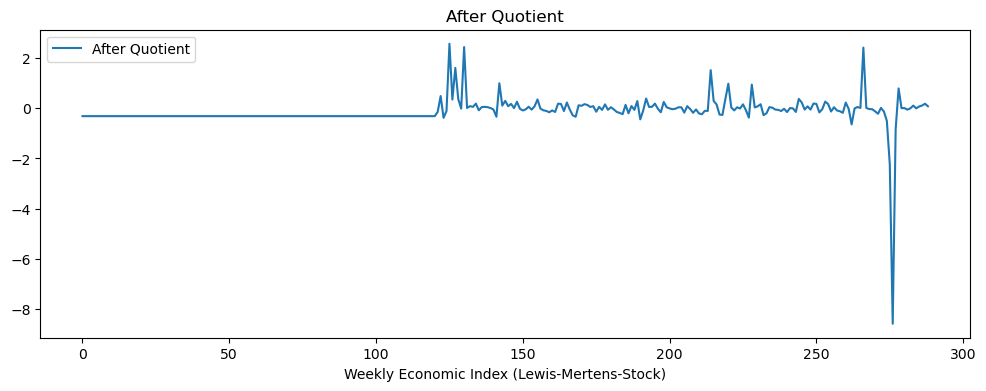

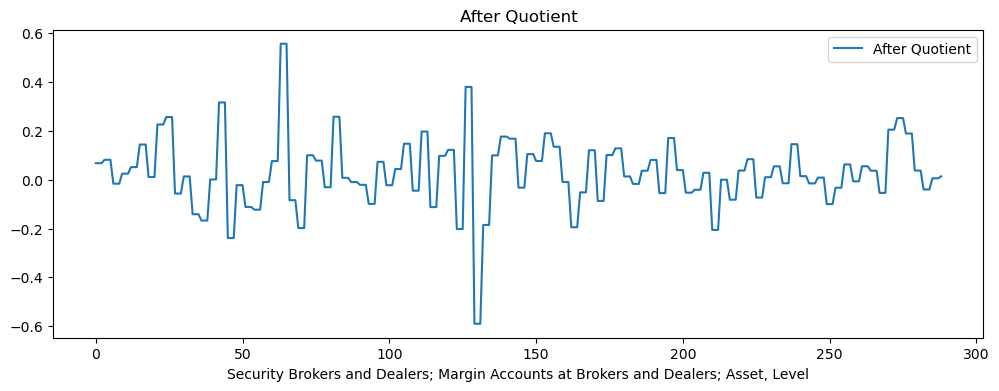

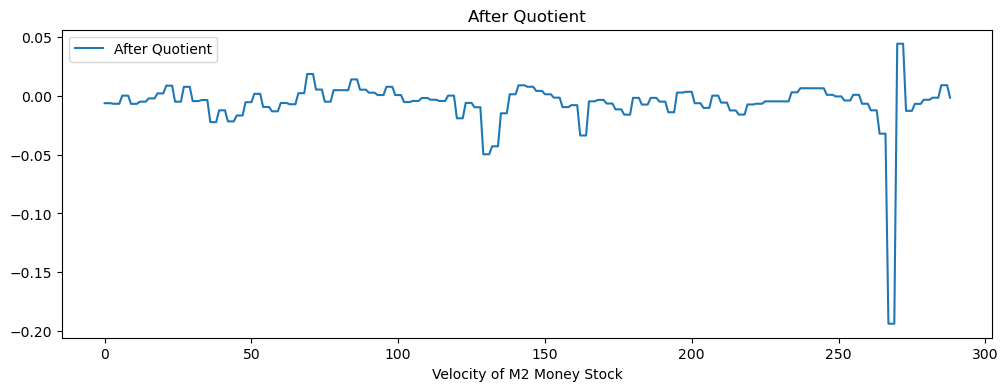

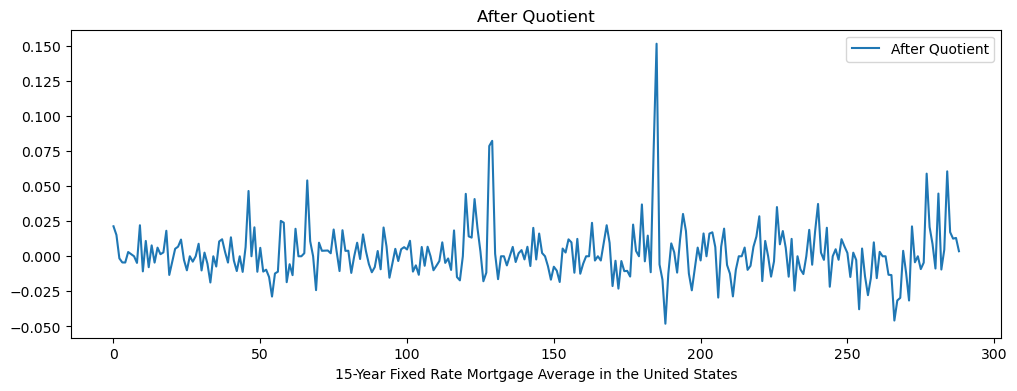

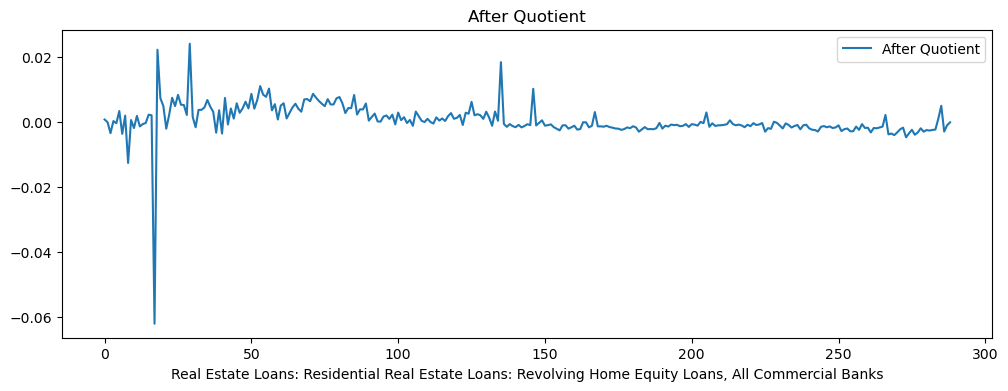

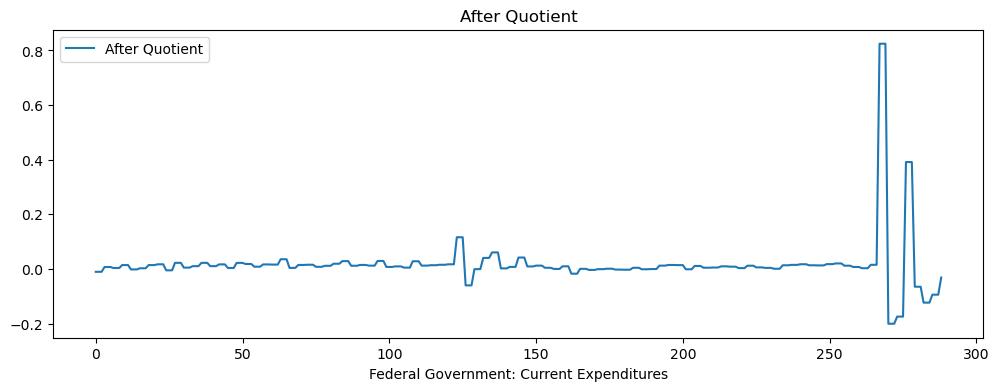

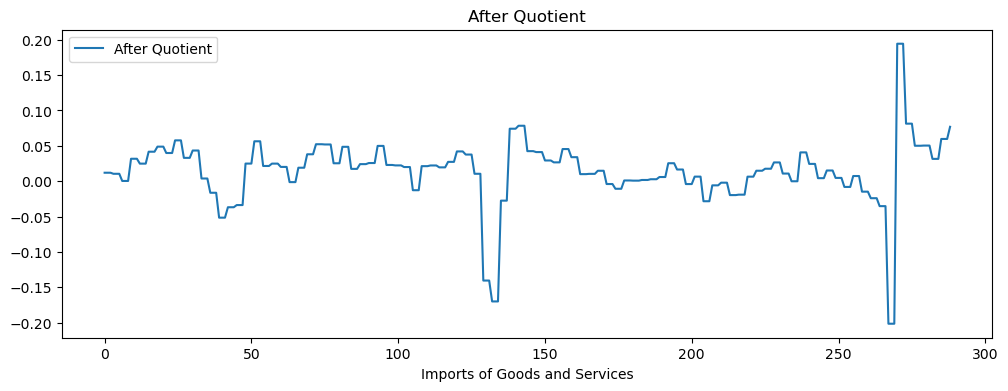

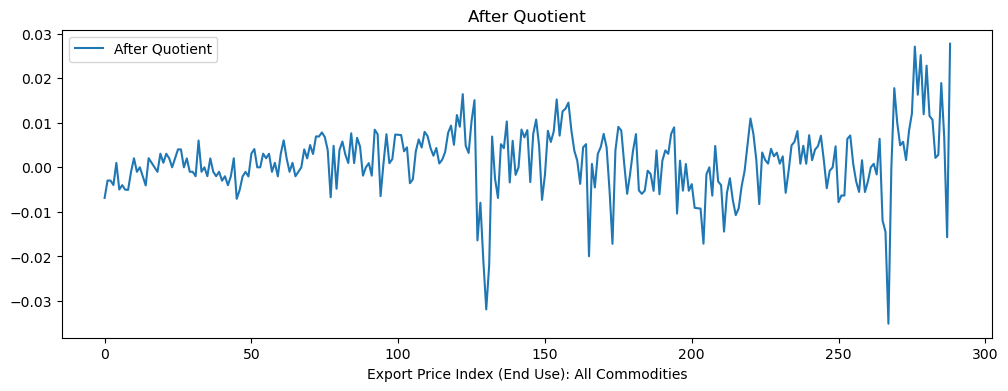

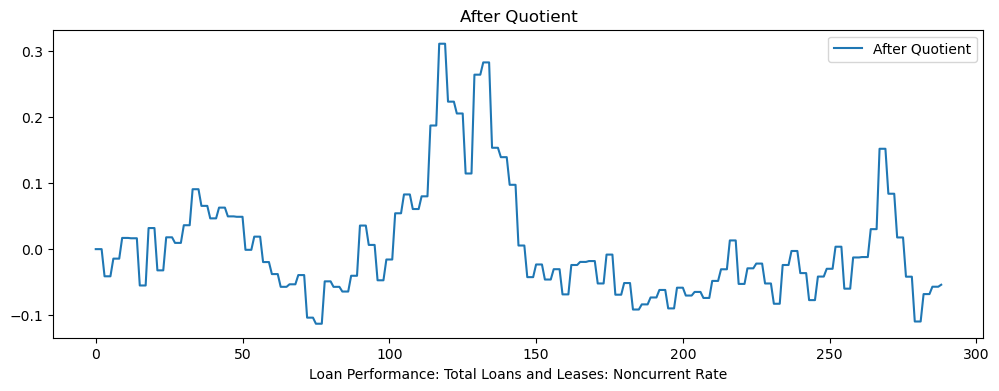

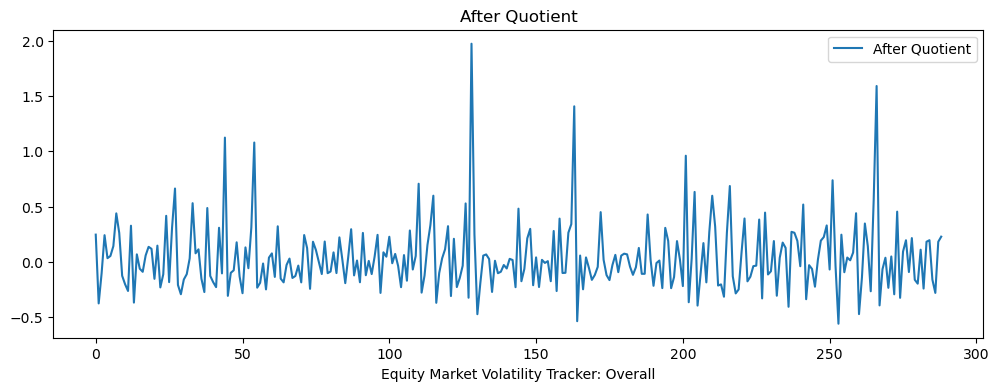

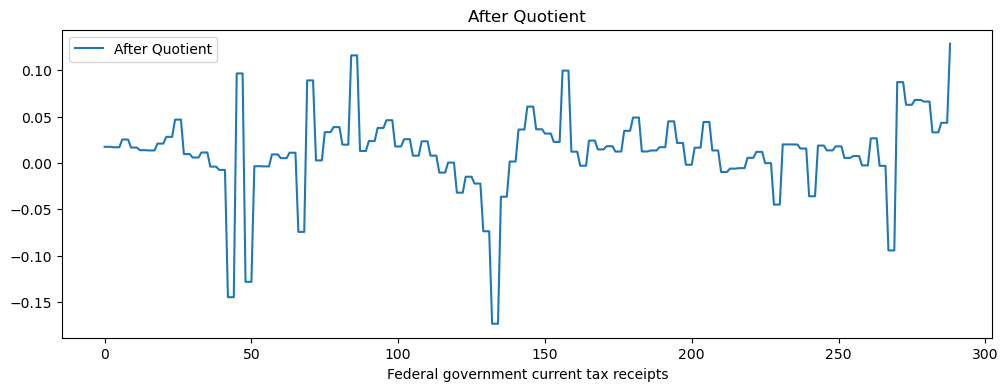

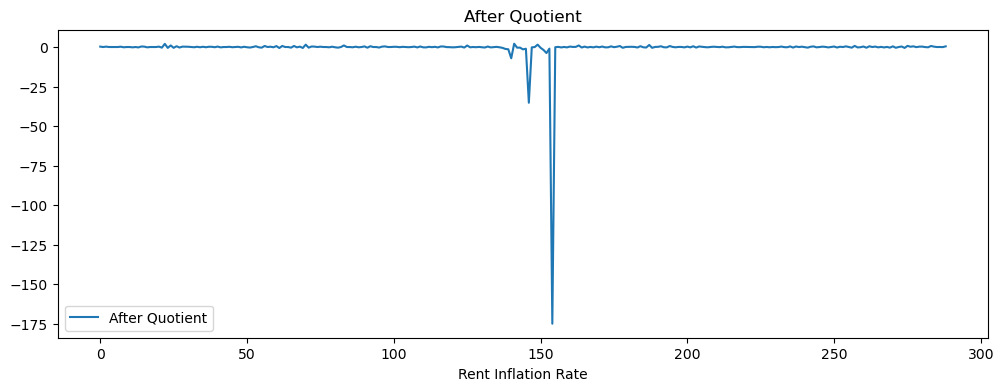

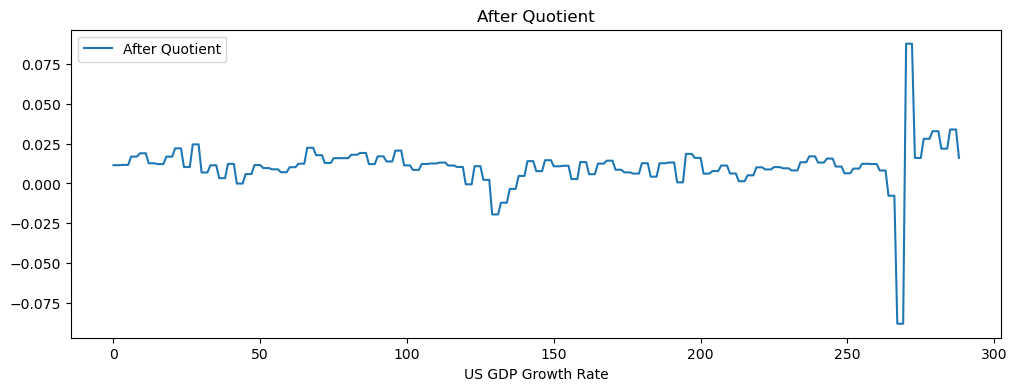

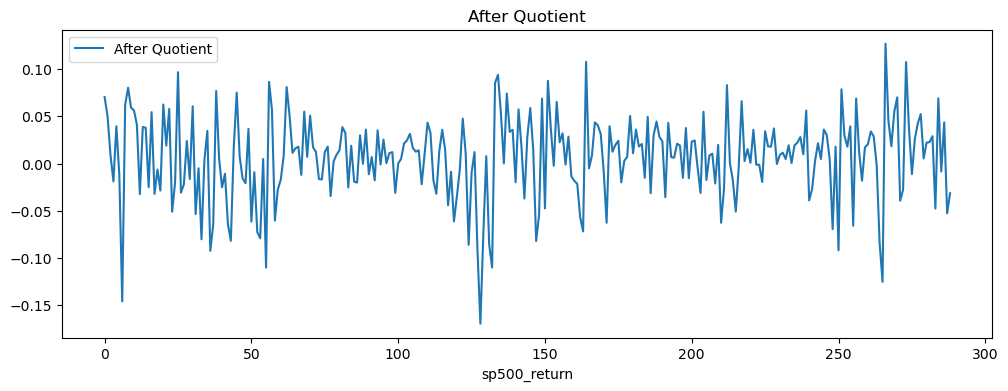

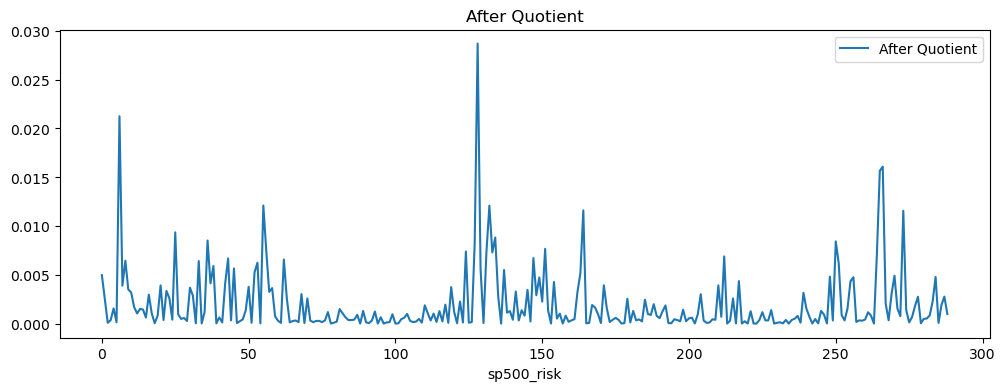

In [199]:
for i in final.columns:
    plt.figure(figsize = (12,4)) 
    plt.plot(final[i], label = "After Quotient")
    plt.legend(loc='best')
    plt.xlabel(i)
    plt.title('After Quotient')
    plt.show()

In [200]:
y=final['sp500'][1:]
X=final['sp500'].shift(1)[1:]

model = sm.OLS(y, X).fit()

    # Extract the residuals
residuals = model.resid

    # Perform the Durbin-Watson test
dw_test = sm.stats.stattools.durbin_watson(residuals)

        #adf_test = adfuller(factors[c[i]])

print(f'S&P \nDurbin: {dw_test}\n')

S&P 
Durbin: 1.9973463638857312



In [201]:
adf_test = adfuller(final['sp500'])
   
print(f'S&P :\nADF Statistic: {adf_test[0]}\nCritical Value @ 0.05: {adf_test[4]["5%"]}\np-value: {adf_test[1]}\n')
        

S&P :
ADF Statistic: -16.138858361237958
Critical Value @ 0.05: -2.87162848654246
p-value: 4.699342901073381e-29



In [202]:
aa=pd.DataFrame(columns=list(final.columns)[2:-2])
for i in list(final.columns)[2:-2]:
    aa.loc[0,i]=np.corrcoef(final['sp500_return'],final[i])[0,1]
    

In [203]:
aa.transpose().sort_values(by=0)

0
Loan Performance: Total Loans and Leases: Noncu... -0.108889
Equity Market Volatility Tracker: Overall          -0.092017
Rent Inflation Rate                                -0.079036
15-Year Fixed Rate Mortgage Average in the Unit... -0.075743
Auto Inventory/Sales Ratio                         -0.068241
Manufacturers Inventory/Sales Ratio                -0.059137
US dollar Index (Nominal Broad U.S. Dollar Index)  -0.055431
Real Estate Loans: Residential Real Estate Loan...  -0.03995
Economic Policy Uncertainty Index for United St... -0.036257
Coincident Economic Activity Index for the Unit... -0.032923
Consumer Price Index (All Urban Items)             -0.031608
Velocity of M2 Money Stock                         -0.026043
Employees on non-agricultural payrolls             -0.023907
Personal income tax                                -0.022033
Call Money/Interbank Rate for the United States     -0.02138
University of Michigan: Consumer Sentiment          -0.01884
Average Weeks Unemployed                           -0.018812
Total unit labor cost                              -0.016351
Average weekly hours for manufacturing             -0.010834
Energy Inflation (Consumer Price Index for All ... -0.007307
Weekly Economic Index (Lewis-Mertens-Stock)         -0.00552
Sticky Consumer Price Index                          0.00001
Aggregate real person income (less transfer pay...  0.000299
US Public debt                                      0.000376
US GDP Growth Rate                                  0.008473
Producer Price Index by Industry (WPI)               0.00855
Imports of Goods and Services                       0.011485
Food Inflation (Consumer Price Index for All Ur...  0.015649
Average Weekly Hours of Production and Nonsuper...  0.016497
Interest Rates                                      0.031308
Manufacturers new orders for non-defense capita...  0.033586
Job Openings (Manufacturing)                        0.037038
Commercial and industrial loans outstanding         0.039057
US unemployment rate                                0.045044
Building permits for new private housing units      0.052611
Manufacturers new orders for consumer goods and...  0.062749
Security Brokers and Dealers; Margin Accounts a...  0.064567
CBOE Volatility Index (VIX)                         0.064885
Retail sales                                        0.066529
Export Price Index (End Use): All Commodities        0.08381
Federal Government: Current Expenditures            0.088248
Industrial Output                                    0.09254
Federal government current tax receipts             0.124756
4-Week Moving Average of Continued Claims           0.132286
Federal Government Tax Income on Corporate          0.166682

In [204]:
aa.to_excel('/Users/adityodasgupta/Documents/McGill/BUSA/TD-Asset-Mangement/Data/Pearsons.xlsx')

# FINAL DATA EXPORT

In [205]:
final.to_excel('/Users/adityodasgupta/Documents/McGill/BUSA/TD-Asset-Mangement/Data/merged_data_with_sp500.xlsx')